## Classify Digits

Install needed library

In [1]:
! pip install matplotlib==3.7.1 matplotlib-inline==0.1.7 matplotlib-venn==0.11.10
! pip install numpy==1.26.4
! pip install fastai==2.7.16 fastbook==0.0.29

In [246]:
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *
import tkinter as tk
from tkinter import filedialog

matplotlib.rc('image', cmap='Greys')

In [247]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/home/andre/.fastai/content/DataML/mnist_png/training'),Path('/home/andre/.fastai/content/DataML/mnist_png/testing')]

In [248]:
train_zeros   = (path/"training/0").ls().sorted()
train_ones    = (path/"training/1").ls().sorted()
train_twos    = (path/"training/2").ls().sorted()
train_threes  = (path/"training/3").ls().sorted()
train_fours   = (path/"training/4").ls().sorted()
train_fives   = (path/"training/5").ls().sorted()
train_sixs    = (path/"training/6").ls().sorted()
train_sevens  = (path/"training/7").ls().sorted()
train_eights  = (path/"training/8").ls().sorted()
train_nines   = (path/"training/9").ls().sorted()

## Baseline Model 

In [249]:
train_zero_tensors    = [tensor(Image.open(obj)) for obj in train_zeros]
train_one_tensors     = [tensor(Image.open(obj)) for obj in train_ones]
train_two_tensors     = [tensor(Image.open(obj)) for obj in train_twos]
train_three_tensors   = [tensor(Image.open(obj)) for obj in train_threes]
train_four_tensors    = [tensor(Image.open(obj)) for obj in train_fours]
train_five_tensors    = [tensor(Image.open(obj)) for obj in train_fives]
train_six_tensors     = [tensor(Image.open(obj)) for obj in train_sixs]
train_seven_tensors   = [tensor(Image.open(obj)) for obj in train_sevens]
train_eight_tensors   = [tensor(Image.open(obj)) for obj in train_eights]
train_nine_tensors    = [tensor(Image.open(obj)) for obj in train_nines]

In [250]:
train_digits = [
    ("zero tensors", train_zero_tensors),
    ("one tensors", train_one_tensors),
    ("two tensors", train_two_tensors),
    ("three tensors", train_three_tensors),
    ("four tensors", train_four_tensors),
    ("five tensors", train_five_tensors),
    ("six tensors", train_six_tensors),
    ("seven tensors", train_seven_tensors),
    ("eight tensors", train_eight_tensors),
    ("nine tensors", train_nine_tensors),
]

for name, digit in train_digits:
    print(f'Number of {name}: {len(digit)}')
    print(digit[0].shape)

Number of zero tensors: 5923
torch.Size([28, 28])
Number of one tensors: 6742
torch.Size([28, 28])
Number of two tensors: 5958
torch.Size([28, 28])
Number of three tensors: 6131
torch.Size([28, 28])
Number of four tensors: 5842
torch.Size([28, 28])
Number of five tensors: 5421
torch.Size([28, 28])
Number of six tensors: 5918
torch.Size([28, 28])
Number of seven tensors: 6265
torch.Size([28, 28])
Number of eight tensors: 5851
torch.Size([28, 28])
Number of nine tensors: 5949
torch.Size([28, 28])


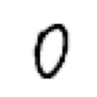

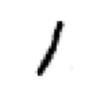

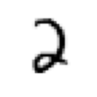

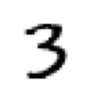

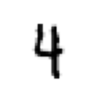

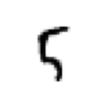

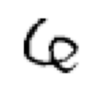

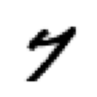

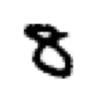

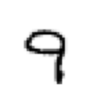

In [251]:
for _, digit in train_digits:
    show_image(digit[1])

Stack and Normalize tensors

In [252]:
train_stacked_zeros   = torch.stack(train_zero_tensors).float() / 255 
train_stacked_ones    = torch.stack(train_one_tensors).float() / 255 
train_stacked_twos    = torch.stack(train_two_tensors).float() / 255 
train_stacked_threes  = torch.stack(train_three_tensors).float() / 255 
train_stacked_fours   = torch.stack(train_four_tensors).float() / 255 
train_stacked_fives   = torch.stack(train_five_tensors).float() / 255 
train_stacked_sixs    = torch.stack(train_six_tensors).float() / 255 
train_stacked_sevens  = torch.stack(train_seven_tensors).float() / 255 
train_stacked_eights  = torch.stack(train_eight_tensors).float() / 255 
train_stacked_nines   = torch.stack(train_nine_tensors).float() / 255 


In [254]:
train_stacked_list = [
    train_stacked_zeros,
    train_stacked_ones,
    train_stacked_twos,
    train_stacked_threes,
    train_stacked_fours,
    train_stacked_fives,
    train_stacked_sixs,
    train_stacked_sevens,
    train_stacked_eights,
    train_stacked_nines
]

In [266]:
mean_list = []
for stacked in train_stacked_list:
    mean_list.append(stacked.mean(0))


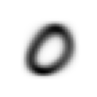

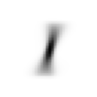

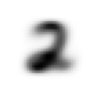

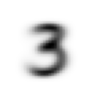

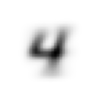

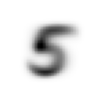

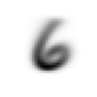

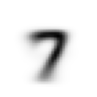

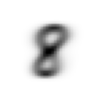

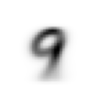

In [256]:
for i in mean_list:
    show_image(i)

In [207]:
test_stacked_zeros   = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/0").ls()]).float() / 255 
test_stacked_ones    = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/1").ls()]).float() / 255 
test_stacked_twos    = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/2").ls()]).float() / 255 
test_stacked_threes  = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/3").ls()]).float() / 255 
test_stacked_fours   = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/4").ls()]).float() / 255 
test_stacked_fives   = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/5").ls()]).float() / 255 
test_stacked_sixs    = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/6").ls()]).float() / 255 
test_stacked_sevens  = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/7").ls()]).float() / 255 
test_stacked_eights  = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/8").ls()]).float() / 255 
test_stacked_nines   = torch.stack([tensor(Image.open(obj)) for obj in (path/"testing/9").ls()]).float() / 255 

In [208]:
test_stacked_list = [
    test_stacked_zeros,
    test_stacked_ones,
    test_stacked_twos,
    test_stacked_threes,
    test_stacked_fours,
    test_stacked_fives,
    test_stacked_sixs,
    test_stacked_sevens,
    test_stacked_eights,
    test_stacked_nines
]

In [267]:
def img_distance(target_tensor, mean_tensor):
    # return (target_tensor - mean_tensor).abs().mean((-1, -2))
    return ((target_tensor - mean_tensor) ** 2).mean((-1, -2)).sqrt()

In [210]:
def update_rmse_and_value_tensors(min_rmse_tensor, rmse_tensor, value_tensor, value):
    if min_rmse_tensor.shape != rmse_tensor.shape or min_rmse_tensor.shape != value_tensor.shape:
        raise ValueError("All tensors must have the same shape")

    mask = rmse_tensor < min_rmse_tensor
    min_rmse_tensor[mask] = rmse_tensor[mask]
    value_tensor[mask] = value

    return min_rmse_tensor, value_tensor

In [269]:
def update_tensors(tensor1, tensor2, tensor3):
    if tensor1.shape != tensor2.shape or tensor1.shape != tensor3.shape:
        raise ValueError("All tensors must have the same shape")

    
    mask = tensor2 < tensor1  
    tensor1[mask] = tensor2[mask] 
    tensor3[mask] = 1  

    return tensor1, tensor3

# Example usage
tensor1 = torch.tensor([5, 2, 8, 4])
tensor2 = torch.tensor([3, 6, 1, 7])
tensor3 = torch.tensor([0, 0, 0, 0])

updated_tensor1, updated_tensor3 = update_tensors(tensor1, tensor2, tensor3)

print("Updated tensor1:", updated_tensor1)
print("Updated tensor3:", updated_tensor3)

Updated tensor1: tensor([3, 2, 1, 4])
Updated tensor3: tensor([1, 0, 1, 0])


In [271]:
INF = float('inf')
digit = 0
for test_tensor in test_stacked_list:
    tensor_size = len(test_tensor)
    min_rmse_tensor = torch.full((tensor_size,), INF)
    value_tensor    = torch.full((tensor_size,), digit)
    
    for index, mean_tensor in enumerate(mean_list):
        rmse_tensor = img_distance(test_tensor, mean_tensor)
        min_rmse_tensor, value_tensor  = update_rmse_and_value_tensors(min_rmse_tensor, rmse_tensor, value_tensor, index)


    binary_tensor = (value_tensor == digit).to(torch.int)
    # print(binary_tensor)
    accuracy = torch.mean(binary_tensor.to(torch.float32))*100
    print(f'The digit {digit} accuracy is: {accuracy}%')
    digit += 1



The digit 0 accuracy is: 89.59183502197266%
The digit 1 accuracy is: 96.2114486694336%
The digit 2 accuracy is: 75.67829132080078%
The digit 3 accuracy is: 80.59405517578125%
The digit 4 accuracy is: 82.58655548095703%
The digit 5 accuracy is: 68.60986328125%
The digit 6 accuracy is: 86.32568359375%
The digit 7 accuracy is: 83.26847839355469%
The digit 8 accuracy is: 73.71663665771484%
The digit 9 accuracy is: 80.67393493652344%


In [280]:
def predict(input_tensor, mean_list):
    distances = [img_distance(input_tensor, mean_tensor) for mean_tensor in mean_list]
    return distances.index(min(distances))
    

In [281]:
def open_file_dialog():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    print(f"Selected file: {file_path}")
    return file_path

user_file = open_file_dialog()

Selected file: /home/andre/code/AI/DL/digit_Classification/test/8.png


 Predict: 8


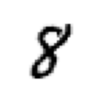

In [283]:
user_file_tensor = tensor(Image.open(user_file))
show_image(user_file_tensor)
print(f' Predict: {predict(user_file_tensor, mean_list)}')